## Import library

In [1]:
import numpy as np
import pandas as pd

from pcaModelling import PCAModel

## Create Sample Data Sets

In [2]:
X = np.array(np.random.normal(0, 1, 100000)).reshape(10000, 10)
X = pd.DataFrame(X, 
                 columns=[f'X{i+1}' for i in range(X.shape[1])])
X.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.353870,0.562573,0.347718,0.034944,0.907484,0.294261,0.832946,0.325626,0.155756,-1.162902
1,-0.602054,0.882996,0.124655,0.152955,-0.077866,1.251424,0.557015,0.735397,-0.995368,0.944196
2,-1.081365,1.681072,1.119998,-0.345830,2.065605,-2.516737,0.646326,0.077888,-0.071650,1.333578


## Fit Model on Data

In [3]:
# Create Model
pca = PCAModel()

# Fit transform
result = pca.fit_transform(X)

_, score, loadings, explained_var_ratio, result_fault_detect = result

Number of Component is 9


In [4]:
# Get Number of Principal Components
n_components = pca.stored_data['n_components']
n_components

9

In [5]:
# Get Explained Variance ratio
explained_var_ratio

array([0.10535786, 0.20877856, 0.31151513, 0.41321143, 0.51295364,
       0.61218001, 0.71098058, 0.8079607 , 0.90423333])

## Plot

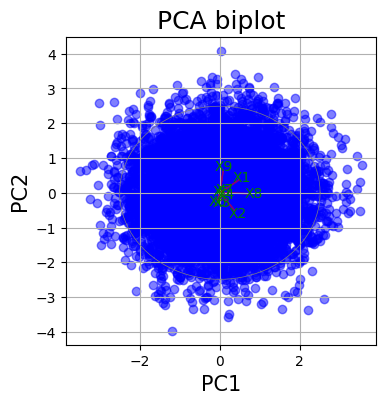

In [6]:
pca.biplot(fig_size=(4,4), opacity=0.5)

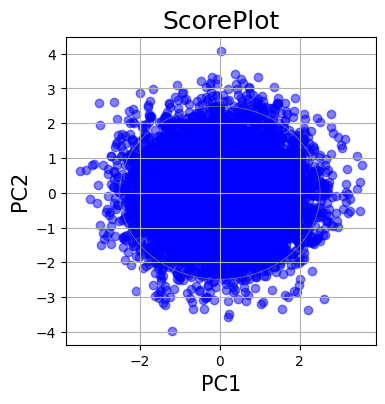

In [7]:
pca.biplot(fig_size=(4,4), plot_loading=False, title="ScorePlot", opacity=0.5)

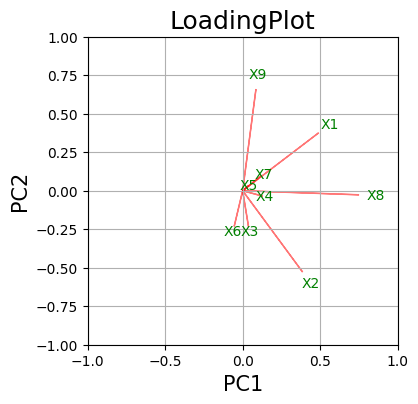

In [8]:
pca.biplot(fig_size=(4,4), plot_score=False, title="LoadingPlot")

## Detect Fault

In [9]:
# Anomaly Score(T2, SPE) for Train Datasets
result_fault_detect

{'t2': {'value': array([ 2.80786547,  5.4330911 , 14.94642885, ...,  9.1216084 ,
          6.23778065, 10.06495481]),
  'detect_result': array([False, False, False, ..., False, False, False])},
 'spe': {'value': array([0.79488036, 0.06658285, 3.34942482, ..., 0.01353493, 0.37824875,
         0.11697888]),
  'detect_result': array([False, False, False, ..., False, False, False])},
 'spe_mean': 0.9576666897767611,
 'spe_std': 1.338573476249273}

### Plot Test Data on Score Plot

In [63]:
# Craete Test Data
outliers = np.array(np.random.uniform(0, 1, 100)).reshape(10, 10)

# Make Fault
outliers[:, 7] += 10
pd.DataFrame(outliers).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.950044,0.901919,0.474929,0.005919,0.188446,0.823622,0.533961,10.326949,0.680622,0.521341
1,0.605599,0.722447,0.805692,0.327849,0.059160,0.436647,0.027225,10.384755,0.514406,0.223199
2,0.278130,0.880734,0.802008,0.478342,0.433347,0.331219,0.043958,10.822641,0.399268,0.400749


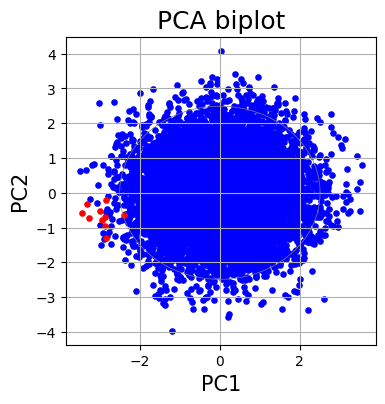

In [64]:
score_test = pca.transform(outliers)
pca.biplot(fig_size=(4,4), score_test=score_test, plot_loading=False, marker_size=14)

In [65]:
# Detect Fault
result_outliers_detect = pca.detect_fault(x=outliers)
result_outliers_detect

{'t2': {'value': array([110.49294239, 109.2554647 , 117.43265673, 107.26004703,
         108.34840176, 121.43160745, 114.7910452 , 109.53055535,
         107.94046227, 106.12950414]),
  'detect_result': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True])},
 'spe': {'value': array([1.52931589, 2.31292967, 3.67180922, 1.48690466, 4.03214992,
         1.09397126, 4.21570006, 1.09889874, 1.28975566, 2.11008567]),
  'detect_result': array([False, False,  True, False,  True, False,  True, False, False,
         False])}}

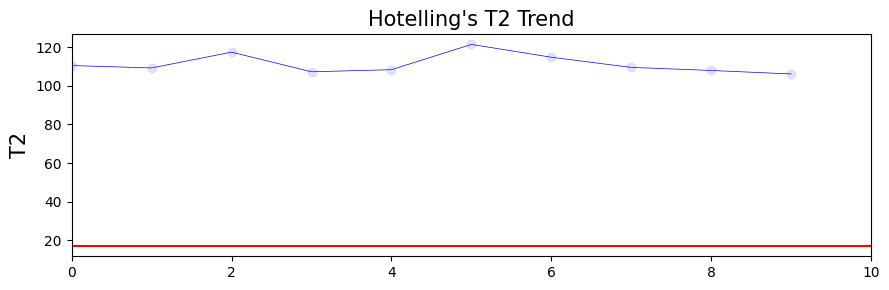

In [66]:
# Plot Hotelling's T2
t2 = result_outliers_detect['t2']['value']
pca.plot_anomaly_score(anomaly_score=t2,
                       detect_method='T2',
                       opacity=0.1, line_width=0.5)

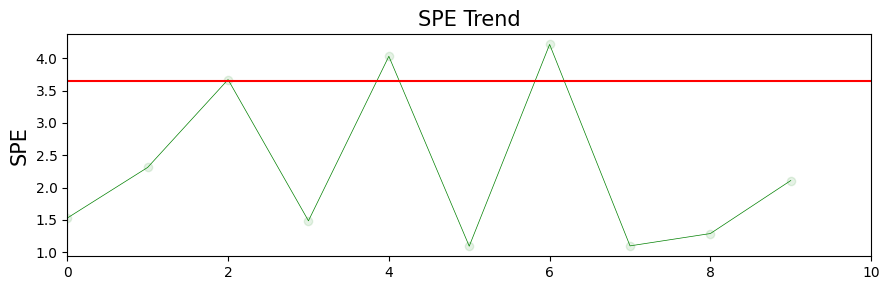

In [67]:
# Plot SPE
spe = result_outliers_detect['spe']['value']
pca.plot_anomaly_score(anomaly_score=spe,
                       detect_method='SPE', 
                       color='green',
                       opacity=0.1, line_width=0.5)

## Identify Fault

In [68]:
contribution_value = pca.get_contribution(x=outliers)
contribution_value

{'X1': 0.5623876079895666,
 'X2': 0.7294980765889928,
 'X3': 0.716331002199238,
 'X4': 0.4576002574955461,
 'X5': 0.47339197351178225,
 'X6': 0.5807805556560849,
 'X7': 0.44235170183342465,
 'X8': 10.473773551749478,
 'X9': 0.5485722718005714,
 'X10': 0.43225626670921946}

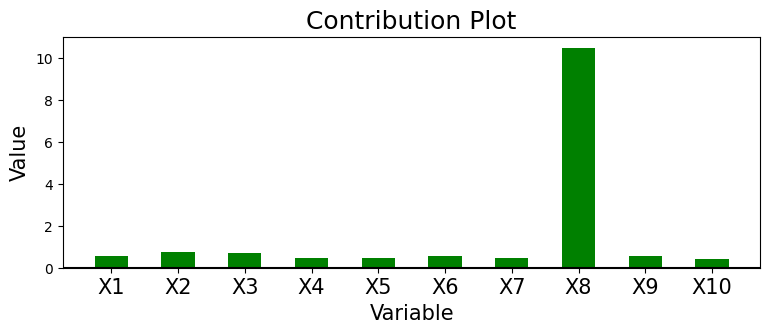

In [69]:
pca.plot_contribution(contribution_value=contribution_value.values(), 
                      labels=contribution_value.keys(),
                     fig_size=(9,3))